In [2]:
import matplotlib.pyplot as plt
import pandas
from matplotlib.pyplot import figure
import numpy as np
import plotly as py
import plotly.graph_objs as go
from plotly import tools
from datetime import datetime
from datetime import timedelta

# Convert time to index

In [8]:
accLinear16 = pandas.read_csv('./data/16/aceleracaoLinear_terra.csv')
groundTruth16 = pandas.read_csv('./data/16/groundTruthEdited.csv')

timingList = []
eventTimingList = []
indexList = [];

for x1, x2 in zip (groundTruth16[' inicio'],groundTruth16[' fim']):
    timingList.append((x1,x2))



start_time = accLinear16['timestamp'][0]
start_time_object = datetime.strptime(start_time, '%d/%m/%Y %H:%M:%S')


for t in range(0,len(groundTruth16)):
    event_start_object = start_time_object + timedelta(seconds = groundTruth16[' inicio'][t])
    event_end_object = start_time_object + timedelta(seconds = groundTruth16[' fim'][t])
    start_event_time = datetime.strftime(event_start_object,'%d/%m/%Y %H:%M:%S')
    end_event_time = datetime.strftime(event_end_object,'%d/%m/%Y %H:%M:%S')
    eventTimingList.append((start_event_time,end_event_time))
    
accLinear16List = list(accLinear16['timestamp'])


minIndex = []
maxIndex = []

for t in eventTimingList:
    minIndex.append( accLinear16List.index(t[0]))
    maxIndex.append( len(accLinear16List) - 1 - accLinear16List[::-1].index(t[1]))

groundTruth16.insert(3,'startIndexinAccLinear',minIndex)
groundTruth16.insert(4,'endIndexinAccLinear',maxIndex)

groundTruth16.to_csv('./data/16/groundTruthEdited.csv')
print(groundTruth16)

                           evento   inicio     fim  startIndexinAccLinear  \
0            evento_nao_agressivo      2.0     6.5                     72   
1         curva_direita_agressiva     19.5    23.5                    938   
2            evento_nao_agressivo     30.0    33.5                   1498   
3         curva_direita_agressiva     95.0    98.0                   4809   
4        curva_esquerda_agressiva    247.0   251.5                  12551   
5        curva_esquerda_agressiva    348.7   352.3                  17696   
6            evento_nao_agressivo    485.0   489.0                  24674   
7        curva_esquerda_agressiva    496.0   499.5                  25234   
8         curva_direita_agressiva    587.0   590.0                  29869   
9        curva_esquerda_agressiva    750.0   753.8                  38172   
10        curva_direita_agressiva    840.7   844.0                  42756   
11        curva_direita_agressiva    980.0   983.2                  49887   

                           evento   inicio     fim
0            evento_nao_agressivo      2.0     6.5
1         curva_direita_agressiva     19.5    23.5
2            evento_nao_agressivo     30.0    33.5
3         curva_direita_agressiva     95.0    98.0
4        curva_esquerda_agressiva    247.0   251.5
5        curva_esquerda_agressiva    348.7   352.3
6            evento_nao_agressivo    485.0   489.0
7        curva_esquerda_agressiva    496.0   499.5
8         curva_direita_agressiva    587.0   590.0
9        curva_esquerda_agressiva    750.0   753.8
10        curva_direita_agressiva    840.7   844.0
11        curva_direita_agressiva    980.0   983.2
12       curva_esquerda_agressiva   1087.4  1090.9
13  troca_faixa_direita_agressiva   1139.8  1142.0
14  troca_faixa_direita_agressiva   1201.0  1202.9
15  troca_faixa_direita_agressiva   1211.4  1213.5


KeyError: ' inicio'

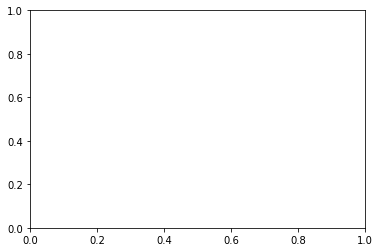

In [45]:
groundTruth = pandas.read_csv('./data/16/groundTruth.csv')
print(groundTruth)

fig, ax = plt.subplots()

for x1, x2 in zip (df[' inicio'],df[' fim']):
    ax.add_patch(plt.Rectangle((x1,0),x2-x1,0.5))

    
ax.autoscale()
ax.set_ylim(-2,2)
plt.show()





In [ ]:
groundTruth16['startIndexinAccLinear'][4]

# Linear Acc 

In [34]:
data_16 = pandas.read_csv('./data/16/aceleracaoLinear_terra.csv')

x_16 = data_16['x']
uptime_16 = data_16['uptimeNanos']
timestamp_16 = data_16['timestamp']

data_17 = pandas.read_csv('./data/17/aceleracaoLinear_terra.csv')
x_17 = data_17['x']
uptime_17 = data_17['uptimeNanos']
timestamp_17 = data_17['timestamp']


# print(timestamp[:380])

# ax = plt.subplots()
# plt.figure(figsize=(20,10))
# ax[1].yaxis.set_ticks(np.arange(-8,8, 0.5))
# plt.plot(uptime_scale[:380],x[:380])
#####################################
#plotly

trace_16 = go.Scatter(
    x = uptime_17[:300],
    y = x_17[:300],
    mode = 'lines'
)

trace_17 = go.Scatter(
    x = uptime_17[8703:9000],
    y = x_17[8703:9000],
    mode = 'lines'
)

trace_break_agg  = go.Scatter(
    x = uptime_17[11760:12064],
    y = x_17[11760:12064],
    mode = 'lines'
)

fig = tools.make_subplots(rows=3, cols=1, subplot_titles=('16','17'))


fig.append_trace(trace_16, 1, 1)
fig.append_trace(trace_17, 2, 1)
fig.append_trace(trace_break_agg, 3, 1)


fig['layout'].update(height=900, width=1200)

py.offline.plot(fig, filename='basic-scatter', auto_open=True)



This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]



'basic-scatter.html'